# Data loading and imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The main library we are going to use is [NetworkX](https://networkx.org)

In [2]:
import networkx as nx

Let's load a sample network. In our [example](http://networksciencebook.com/translations/en/resources/data.html), nodes represent web pages, directed links represent hyperlinks between them. 
The network was preliminarily uploaded to Google Drive, so we'll load it from a public link. 


In [3]:
import gdown

!gdown 1NNGVyVMJXG95nZwIqugM3mDtbyr9OTLH

Downloading...
From: https://drive.google.com/uc?id=1NNGVyVMJXG95nZwIqugM3mDtbyr9OTLH
To: c:\Users\kuzne\Documents\ACTIVE_PROJECTS\network_science\sem1\www.edgelist.txt

  0%|          | 0.00/20.1M [00:00<?, ?B/s]
  3%|▎         | 524k/20.1M [00:00<00:07, 2.78MB/s]
  8%|▊         | 1.57M/20.1M [00:00<00:03, 4.75MB/s]
 16%|█▌        | 3.15M/20.1M [00:00<00:02, 7.44MB/s]
 42%|████▏     | 8.39M/20.1M [00:00<00:00, 18.7MB/s]
 63%|██████▎   | 12.6M/20.1M [00:00<00:00, 25.0MB/s]
 84%|████████▎ | 16.8M/20.1M [00:00<00:00, 29.5MB/s]
100%|██████████| 20.1M/20.1M [00:00<00:00, 22.2MB/s]


In [57]:
G = nx.read_edgelist('www.edgelist.txt', create_using=nx.DiGraph)

# Preliminaries

In [58]:
#@title Beautiful figure transformer { form-width: "300px" }
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab


def make_beautiful(ax):
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(4)
        ax.tick_params(width=4, direction = 'in', length = 8, pad=15)

    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0.0)

    ax.locator_params(axis='x', nbins=8)
    ax.locator_params(axis='y', nbins=8)
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    
    params = {'legend.fontsize': 18,
              'axes.titlesize': 30,
    }
    
    pylab.rcParams.update(params)

    return ax


def create_default_figure(a=16, b=12):
    fig, ax = plt.subplots(figsize = (a,b))
    ax = make_beautiful(ax)

    return fig, ax

We load the graph and display its main properties: number of edges $E$, number of nodes $N$, density $\rho$. 
The density is defined as
$$
\rho=\frac{2E}{N(N-1)}.
$$

In [59]:
print('Nodes:', G.number_of_nodes())
print('Edges:', G.number_of_edges())
print('Density:', nx.density(G))

Nodes: 325729
Edges: 1497134
Density: 1.4110719364589702e-05


In [60]:
list(G.nodes())[:5] # first 5 nodes

['0', '1', '2', '3', '4']

In [61]:
list(G.edges())[2300:2310] # 10 edges

[('201', '1666'),
 ('201', '1667'),
 ('201', '1668'),
 ('201', '1669'),
 ('201', '1670'),
 ('201', '1671'),
 ('201', '1672'),
 ('201', '1673'),
 ('201', '1674'),
 ('201', '1675')]

All neighbors of a node:

In [62]:
G['50']

AtlasView({'50': {}, '55': {}, '64': {}, '189': {}, '878': {}, '879': {}})

In [63]:
dict(G['50'])

{'50': {}, '55': {}, '64': {}, '189': {}, '878': {}, '879': {}}

In [64]:
len(G['50'])

6

# Connected components

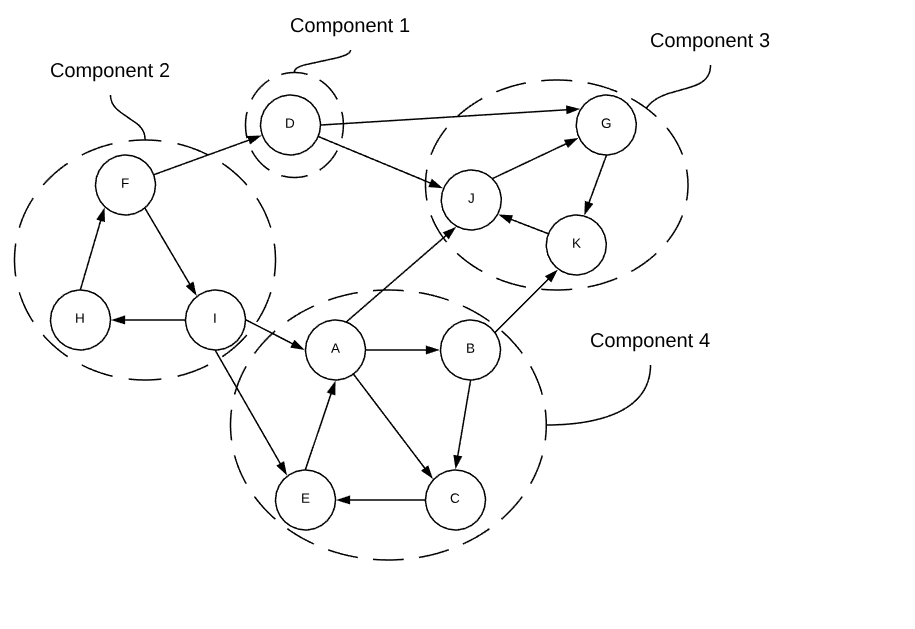

Weakly connected components:

In [65]:
cc = list(nx.weakly_connected_components(G))

In [66]:
len(cc)

1

Strongly connected components:

In [67]:
scc = list(nx.strongly_connected_components(G))

In [68]:
scc

[{'2928'},
 {'259'},
 {'260'},
 {'261'},
 {'262'},
 {'265'},
 {'10529'},
 {'32968'},
 {'266'},
 {'10913'},
 {'10914'},
 {'10915'},
 {'10916'},
 {'10917'},
 {'10918'},
 {'10919'},
 {'10920'},
 {'10921'},
 {'10922'},
 {'10923'},
 {'10924'},
 {'10925'},
 {'10926'},
 {'10929'},
 {'2803'},
 {'2742'},
 {'10927'},
 {'10928'},
 {'2800'},
 {'2794'},
 {'2795'},
 {'62135'},
 {'62136'},
 {'62137'},
 {'62138'},
 {'24615'},
 {'62139'},
 {'62140'},
 {'62141'},
 {'24616'},
 {'7000'},
 {'7001'},
 {'4353'},
 {'44605'},
 {'22860'},
 {'34692'},
 {'34694'},
 {'43772'},
 {'44642'},
 {'44643'},
 {'44644'},
 {'44645'},
 {'44646'},
 {'44647'},
 {'44648'},
 {'44649'},
 {'44650'},
 {'44651'},
 {'1789'},
 {'19586'},
 {'44652'},
 {'17377'},
 {'44653'},
 {'44654'},
 {'44655'},
 {'44656'},
 {'44657'},
 {'44658'},
 {'44659'},
 {'44660'},
 {'44661'},
 {'44662'},
 {'44663'},
 {'44664'},
 {'44665'},
 {'44666'},
 {'44667'},
 {'44590'},
 {'44591'},
 {'44592'},
 {'44593'},
 {'44594'},
 {'44595'},
 {'44596'},
 {'44597'},
 {

In [69]:
len(scc)

203609

Distribution of component sizes:

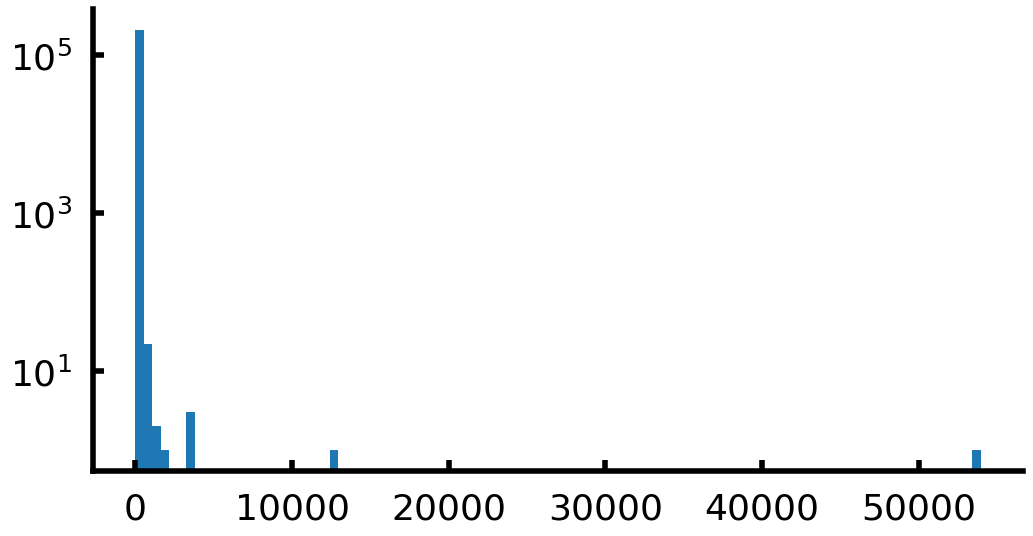

In [70]:
sizes = [len(comp) for comp in scc]

fig, ax = plt.subplots(figsize = (12, 6))
ax = make_beautiful(ax)
_ = ax.hist(sizes, bins=100, log=True)

In [71]:
sorted_scc = sorted(scc, key = len)
small_comp = sorted_scc[-200]
large_comp = sorted_scc[-1]

In [72]:
print(len(small_comp))
print(len(large_comp))

56
53968


# Node and edge properties

In [73]:
all_colors = ['r', 'y', 'g', 'b', 'm', 'c', 'k']

Gs = nx.subgraph(G, small_comp)

cdict = {}
for node in Gs.nodes():
    clr = np.random.choice(all_colors)
    properties = {'color': clr}
    cdict.update({node: properties})
    # nx.set_node_attributes(Gs, {node: properties})

In [74]:
cdict

{'25173': {'color': 'k'},
 '192941': {'color': 'g'},
 '150269': {'color': 'y'},
 '318271': {'color': 'b'},
 '243396': {'color': 'g'},
 '192939': {'color': 'k'},
 '192940': {'color': 'y'},
 '175812': {'color': 'm'},
 '264838': {'color': 'm'},
 '320193': {'color': 'k'},
 '35125': {'color': 'c'},
 '124100': {'color': 'm'},
 '150266': {'color': 'r'},
 '35119': {'color': 'm'},
 '64883': {'color': 'k'},
 '192945': {'color': 'y'},
 '192948': {'color': 'g'},
 '213789': {'color': 'y'},
 '150268': {'color': 'g'},
 '192944': {'color': 'b'},
 '124089': {'color': 'g'},
 '150267': {'color': 'y'},
 '192943': {'color': 'b'},
 '35123': {'color': 'y'},
 '25176': {'color': 'g'},
 '324029': {'color': 'g'},
 '323800': {'color': 'c'},
 '192950': {'color': 'g'},
 '91239': {'color': 'r'},
 '192949': {'color': 'y'},
 '124098': {'color': 'm'},
 '308257': {'color': 'g'},
 '292952': {'color': 'g'},
 '124093': {'color': 'm'},
 '35122': {'color': 'k'},
 '319365': {'color': 'm'},
 '64882': {'color': 'b'},
 '192946':

In [75]:
Gs.nodes(data = True)

NodeDataView({'25173': {}, '192941': {}, '150269': {}, '318271': {}, '243396': {}, '192939': {}, '192940': {}, '175812': {}, '264838': {}, '320193': {}, '35125': {}, '124100': {}, '150266': {}, '35119': {}, '64883': {}, '192945': {}, '192948': {}, '213789': {}, '150268': {}, '192944': {}, '124089': {}, '150267': {}, '192943': {}, '35123': {}, '25176': {}, '324029': {}, '323800': {}, '192950': {}, '91239': {}, '192949': {}, '124098': {}, '308257': {}, '292952': {}, '124093': {}, '35122': {}, '319365': {}, '64882': {}, '192946': {}, '64881': {}, '124095': {}, '11859': {}, '316115': {}, '313821': {}, '124099': {}, '64880': {}, '124094': {}, '25174': {}, '192942': {}, '192947': {}, '192951': {}, '91240': {}, '285127': {}, '124096': {}, '25175': {}, '124091': {}, '35120': {}})

In [76]:
nx.set_node_attributes(Gs, cdict)

In [77]:
Gs.nodes(data = True)

NodeDataView({'25173': {'color': 'k'}, '192941': {'color': 'g'}, '150269': {'color': 'y'}, '318271': {'color': 'b'}, '243396': {'color': 'g'}, '192939': {'color': 'k'}, '192940': {'color': 'y'}, '175812': {'color': 'm'}, '264838': {'color': 'm'}, '320193': {'color': 'k'}, '35125': {'color': 'c'}, '124100': {'color': 'm'}, '150266': {'color': 'r'}, '35119': {'color': 'm'}, '64883': {'color': 'k'}, '192945': {'color': 'y'}, '192948': {'color': 'g'}, '213789': {'color': 'y'}, '150268': {'color': 'g'}, '192944': {'color': 'b'}, '124089': {'color': 'g'}, '150267': {'color': 'y'}, '192943': {'color': 'b'}, '35123': {'color': 'y'}, '25176': {'color': 'g'}, '324029': {'color': 'g'}, '323800': {'color': 'c'}, '192950': {'color': 'g'}, '91239': {'color': 'r'}, '192949': {'color': 'y'}, '124098': {'color': 'm'}, '308257': {'color': 'g'}, '292952': {'color': 'g'}, '124093': {'color': 'm'}, '35122': {'color': 'k'}, '319365': {'color': 'm'}, '64882': {'color': 'b'}, '192946': {'color': 'k'}, '64881'

In [78]:
wdict = {}
for edge in Gs.edges():
    w = 0.1+np.random.random()
    properties = {'weight': w}
    wdict.update({edge: properties})

In [79]:
list(Gs.edges(data = True))[:10]

[('25173', '25173', {}),
 ('25173', '25174', {}),
 ('25173', '25175', {}),
 ('25173', '25176', {}),
 ('25173', '64880', {}),
 ('25173', '64881', {}),
 ('25173', '64882', {}),
 ('25173', '64883', {}),
 ('192941', '11859', {}),
 ('192941', '150266', {})]

In [80]:
nx.set_edge_attributes(Gs, wdict)

In [81]:
list(Gs.edges(data = True))[:10]

[('25173', '25173', {'weight': 0.24267628513616227}),
 ('25173', '25174', {'weight': 0.5898023509804405}),
 ('25173', '25175', {'weight': 0.2247954841729596}),
 ('25173', '25176', {'weight': 0.3800009407871513}),
 ('25173', '64880', {'weight': 0.11945384008070117}),
 ('25173', '64881', {'weight': 0.9675425519522524}),
 ('25173', '64882', {'weight': 0.20887133860809584}),
 ('25173', '64883', {'weight': 0.8247242703651909}),
 ('192941', '11859', {'weight': 0.9225750363577457}),
 ('192941', '150266', {'weight': 1.03048381655054})]

In [82]:
nx.get_node_attributes(Gs, 'color')

{'25173': 'k',
 '192941': 'g',
 '150269': 'y',
 '318271': 'b',
 '243396': 'g',
 '192939': 'k',
 '192940': 'y',
 '175812': 'm',
 '264838': 'm',
 '320193': 'k',
 '35125': 'c',
 '124100': 'm',
 '150266': 'r',
 '35119': 'm',
 '64883': 'k',
 '192945': 'y',
 '192948': 'g',
 '213789': 'y',
 '150268': 'g',
 '192944': 'b',
 '124089': 'g',
 '150267': 'y',
 '192943': 'b',
 '35123': 'y',
 '25176': 'g',
 '324029': 'g',
 '323800': 'c',
 '192950': 'g',
 '91239': 'r',
 '192949': 'y',
 '124098': 'm',
 '308257': 'g',
 '292952': 'g',
 '124093': 'm',
 '35122': 'k',
 '319365': 'm',
 '64882': 'b',
 '192946': 'k',
 '64881': 'y',
 '124095': 'k',
 '11859': 'k',
 '316115': 'b',
 '313821': 'g',
 '124099': 'm',
 '64880': 'y',
 '124094': 'r',
 '25174': 'b',
 '192942': 'c',
 '192947': 'g',
 '192951': 'k',
 '91240': 'y',
 '285127': 'g',
 '124096': 'y',
 '25175': 'y',
 '124091': 'b',
 '35120': 'k'}

In [83]:
Gs['124100']

AtlasView(FilterAtlas({'11859': {'weight': 0.5574413741784926}, '25173': {'weight': 0.5900865598689234}, '25174': {'weight': 0.6387255744269824}, '25175': {'weight': 1.0894729087989772}, '25176': {'weight': 0.5496869968267152}, '64881': {'weight': 0.3782387852815231}, '64882': {'weight': 0.4704050115946973}, '64883': {'weight': 0.14441981396637207}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x000001E93209FEB0>))

In [84]:
dict(Gs['124100'])

{'11859': {'weight': 0.5574413741784926},
 '25173': {'weight': 0.5900865598689234},
 '25174': {'weight': 0.6387255744269824},
 '25175': {'weight': 1.0894729087989772},
 '25176': {'weight': 0.5496869968267152},
 '64881': {'weight': 0.3782387852815231},
 '64882': {'weight': 0.4704050115946973},
 '64883': {'weight': 0.14441981396637207}}

# Visualization

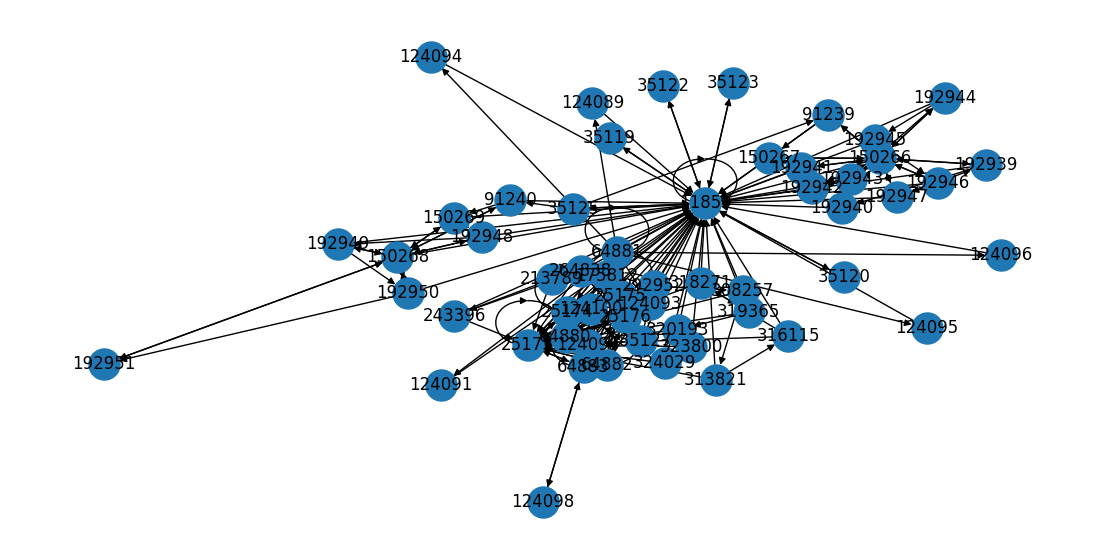

In [88]:
fig, ax = plt.subplots(figsize = (14, 7))

seed = 42
pos = nx.spring_layout(Gs, seed = 42)
_ = nx.draw(Gs, pos = pos, with_labels=True, ax = ax, node_size = 500)

Let's make high-degree nodes red/green:

In [89]:
node_color = {node: 'r' if Gs.out_degree(node) > 10 else 'g' if Gs.in_degree(node) > 10 else 'b' for node in Gs.nodes()}

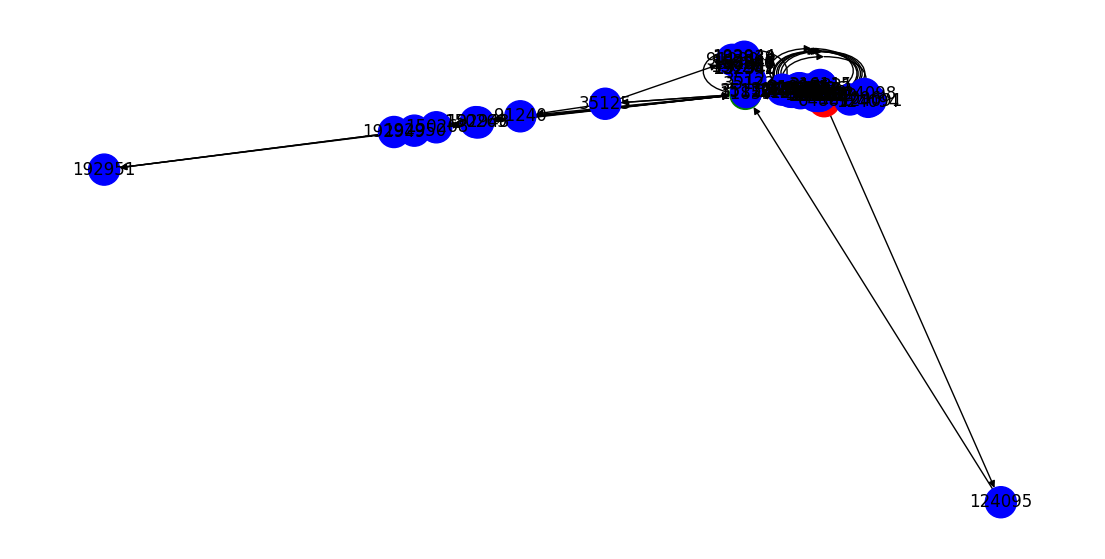

In [93]:
fig, ax = plt.subplots(figsize=(14, 7))

seed = 42
# pos = nx.spring_layout(Gs, seed = 42)
pos = nx.spectral_layout(Gs)
_ = nx.draw(Gs, pos = pos, with_labels=1, ax = ax, node_size = 500, node_color = list(node_color.values()))

Custom node colors:

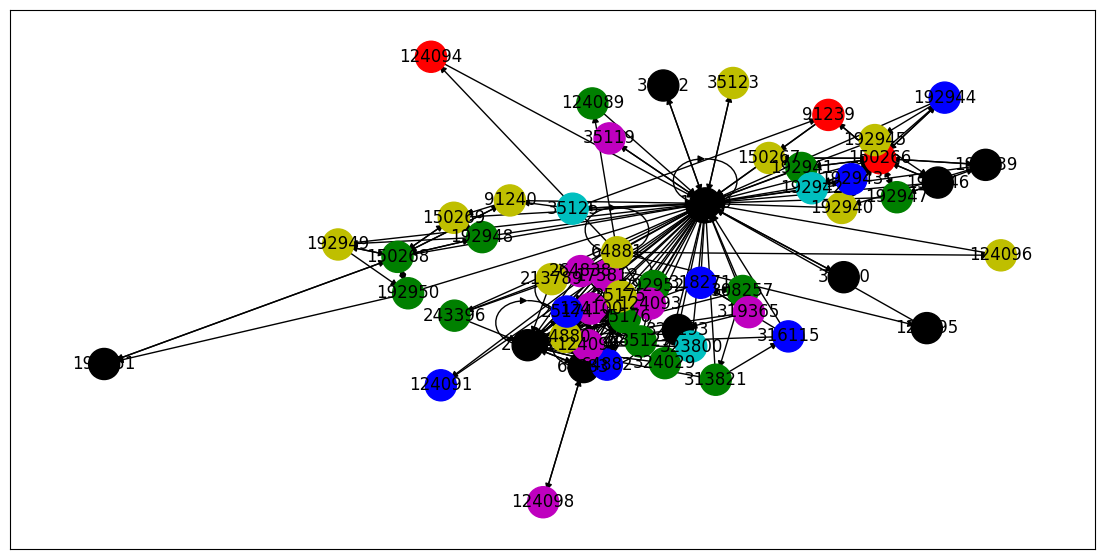

In [94]:
fig, ax = plt.subplots(figsize = (14, 7))

seed = 42
pos = nx.spring_layout(Gs, seed = seed)
#pos = nx.circular_layout(G)

colors = nx.get_node_attributes(Gs, 'color').values()
_ = nx.draw_networkx_nodes(Gs, pos = pos, ax = ax, node_size = 500, node_color = colors, label = True)
_ = nx.draw_networkx_edges(Gs, pos = pos)
_ = nx.draw_networkx_labels(Gs, pos = pos)
#_ = nx.draw_networkx_edges(Gs, pos = pos, width=[10*x if x>0.01 else 0 for x in list(e_weights.values())])

Custom edge weights:

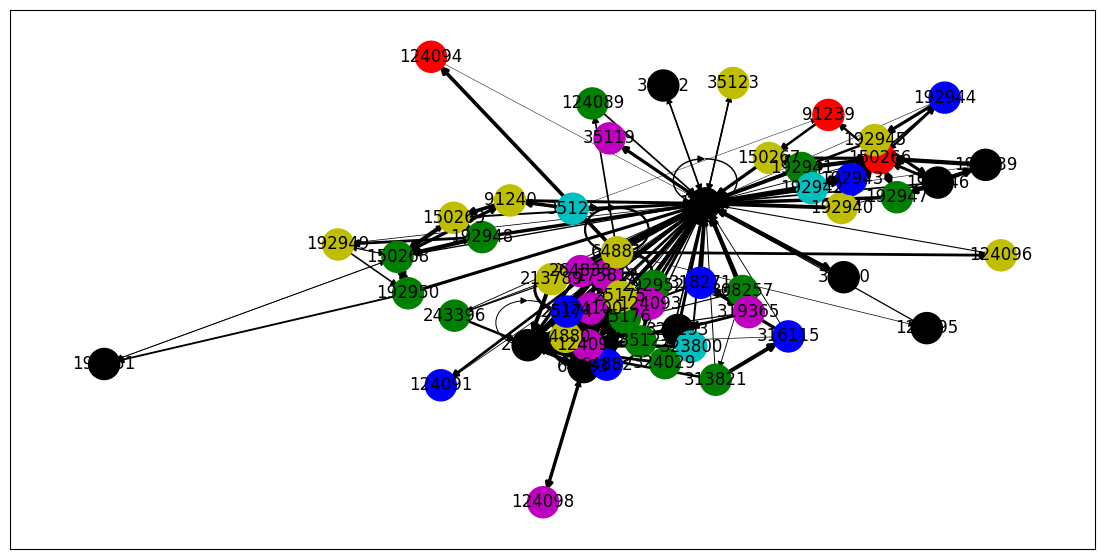

In [95]:
fig, ax = plt.subplots(figsize = (14, 7))

seed = 42
pos = nx.spring_layout(Gs, seed = seed)
#pos = nx.circular_layout(G)

e_weights = dict([((n1, n2), d['weight']) for n1, n2, d in Gs.edges(data=True)])

colors = nx.get_node_attributes(Gs, 'color').values()
_ = nx.draw_networkx_nodes(Gs, pos = pos, ax = ax, node_size = 500, node_color = colors, label = True)
_ = nx.draw_networkx_labels(Gs, pos = pos)
_ = nx.draw_networkx_edges(Gs, pos = pos, width=[x*3 for x in list(e_weights.values())])

# Editing nodes and edges

In [96]:
n = 50
p = 0.1
H = nx.gnp_random_graph(n, p)
# nx.erdos_renyi_graph(n, p) ??

In [97]:
H.edges()

EdgeView([(0, 3), (0, 12), (0, 14), (0, 27), (0, 28), (0, 39), (0, 49), (1, 4), (1, 11), (1, 39), (2, 3), (2, 12), (2, 21), (2, 25), (2, 36), (2, 39), (2, 43), (2, 46), (3, 28), (3, 36), (4, 17), (4, 20), (4, 26), (4, 32), (4, 45), (4, 47), (5, 6), (5, 31), (5, 47), (6, 23), (6, 37), (6, 38), (7, 18), (7, 20), (7, 24), (7, 25), (7, 37), (8, 14), (8, 26), (8, 29), (8, 36), (8, 37), (8, 42), (8, 46), (9, 18), (9, 21), (9, 27), (9, 33), (9, 46), (10, 12), (10, 16), (10, 33), (10, 45), (11, 14), (11, 15), (11, 20), (12, 16), (12, 22), (12, 31), (12, 33), (12, 36), (12, 42), (13, 16), (13, 25), (14, 24), (14, 39), (14, 44), (14, 47), (15, 34), (16, 30), (16, 32), (17, 23), (17, 29), (17, 49), (18, 42), (18, 47), (19, 24), (19, 27), (19, 35), (20, 38), (20, 40), (20, 44), (22, 33), (22, 45), (23, 28), (23, 29), (23, 36), (23, 43), (24, 25), (25, 28), (25, 38), (25, 41), (25, 48), (28, 43), (28, 49), (29, 41), (29, 45), (29, 47), (30, 37), (30, 39), (30, 48), (30, 49), (31, 33), (32, 35), (32

In [98]:
adj = nx.adjacency_matrix(H).A

C:\Users\kuzne\AppData\Local\Temp\ipykernel_12556\1203948199.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(H).A


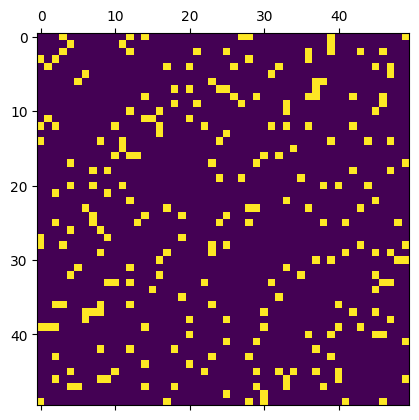

In [99]:
plt.matshow(adj)

In [100]:
H2 = nx.gnp_random_graph(n, p)
mapping = {i:i+50 for i in H2.nodes}
H2 = nx.relabel_nodes(H2, mapping)

In [101]:
H2.nodes()

NodeView((50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [102]:
H2.edges()

EdgeView([(50, 57), (50, 71), (50, 90), (50, 97), (51, 74), (51, 84), (51, 88), (51, 92), (52, 65), (52, 68), (52, 87), (52, 89), (53, 59), (53, 61), (54, 67), (54, 98), (55, 64), (55, 65), (55, 71), (55, 83), (56, 63), (56, 92), (57, 63), (57, 70), (57, 81), (57, 89), (57, 91), (57, 93), (57, 97), (58, 60), (58, 73), (59, 66), (59, 77), (59, 79), (59, 83), (60, 61), (60, 86), (61, 73), (61, 94), (62, 63), (62, 79), (62, 85), (62, 89), (63, 76), (64, 65), (64, 78), (64, 86), (64, 95), (64, 99), (65, 68), (65, 91), (66, 71), (66, 74), (66, 87), (67, 70), (67, 84), (67, 96), (68, 70), (68, 72), (69, 75), (69, 79), (69, 90), (69, 95), (69, 96), (70, 83), (70, 84), (70, 96), (71, 80), (71, 96), (71, 99), (73, 79), (73, 84), (73, 85), (73, 98), (74, 80), (74, 84), (74, 85), (74, 89), (75, 83), (75, 99), (76, 78), (76, 93), (76, 95), (76, 96), (76, 97), (76, 98), (77, 78), (77, 84), (77, 92), (77, 99), (78, 79), (78, 81), (78, 82), (79, 89), (79, 99), (80, 81), (81, 83), (81, 98), (82, 87), 

In [103]:
H.add_nodes_from(H2.nodes())
H.add_edges_from(H2.edges())

C:\Users\kuzne\AppData\Local\Temp\ipykernel_12556\1112062216.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(H).A


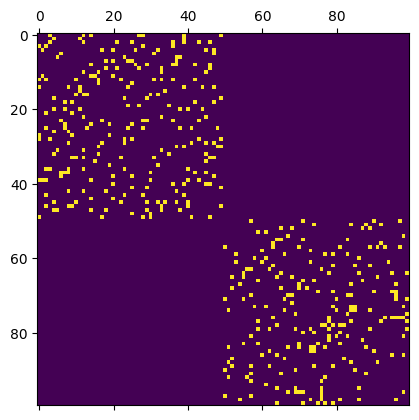

In [104]:
adj = nx.adjacency_matrix(H).A
plt.matshow(adj)

In [105]:
H.add_edge(2, 60)
H.add_edge(6, 80)

C:\Users\kuzne\AppData\Local\Temp\ipykernel_12556\1112062216.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(H).A


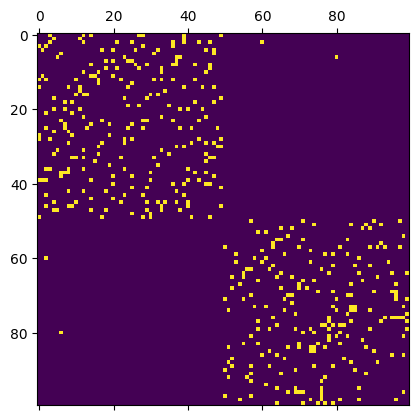

In [106]:
adj = nx.adjacency_matrix(H).A
plt.matshow(adj)

In [107]:
H = nx.freeze(H)

In [108]:
H.add_edge(3, 70)

NetworkXError: Frozen graph can't be modified

In [109]:
Hnew = H.copy()
H3 = nx.gnp_random_graph(n, p)

Hfull = nx.compose(Hnew, H3) # composing with the same nodes

C:\Users\kuzne\AppData\Local\Temp\ipykernel_12556\1860641654.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(Hfull).A


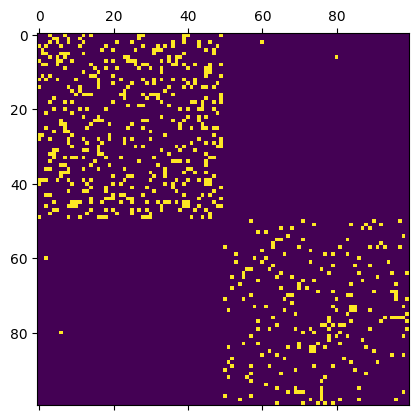

In [110]:
adj = nx.adjacency_matrix(Hfull).A
plt.matshow(adj)

In [111]:
Hfull = nx.disjoint_union(Hnew, H3) # composing with unique nodes

C:\Users\kuzne\AppData\Local\Temp\ipykernel_12556\1860641654.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(Hfull).A


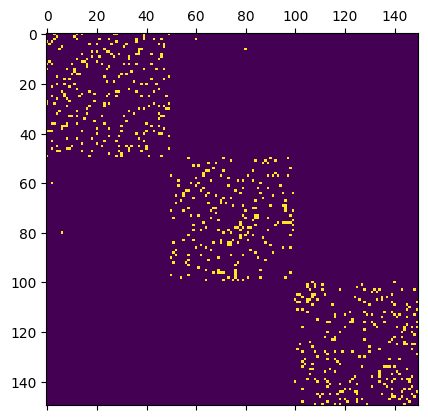

In [112]:
adj = nx.adjacency_matrix(Hfull).A
plt.matshow(adj)

# Degree distribution

nx.Graph.degree returns DegreeView (similar to a dictionary)

In [ ]:
G.degree()

In [114]:
G.degree('50')

13

In [115]:
G.out_degree('50')

6

Create a list of all degree values and print the maximum and minimum values of the degree:

In [116]:
degrees=[d for n, d in G.degree()]
print(np.mean(degrees))
print('Max degree:', np.max(degrees))
print('Min degree:', np.min(degrees)) 

9.192512794378148
Max degree: 10721
Min degree: 1


Text(0, 0.5, '$\\rho(k)$')

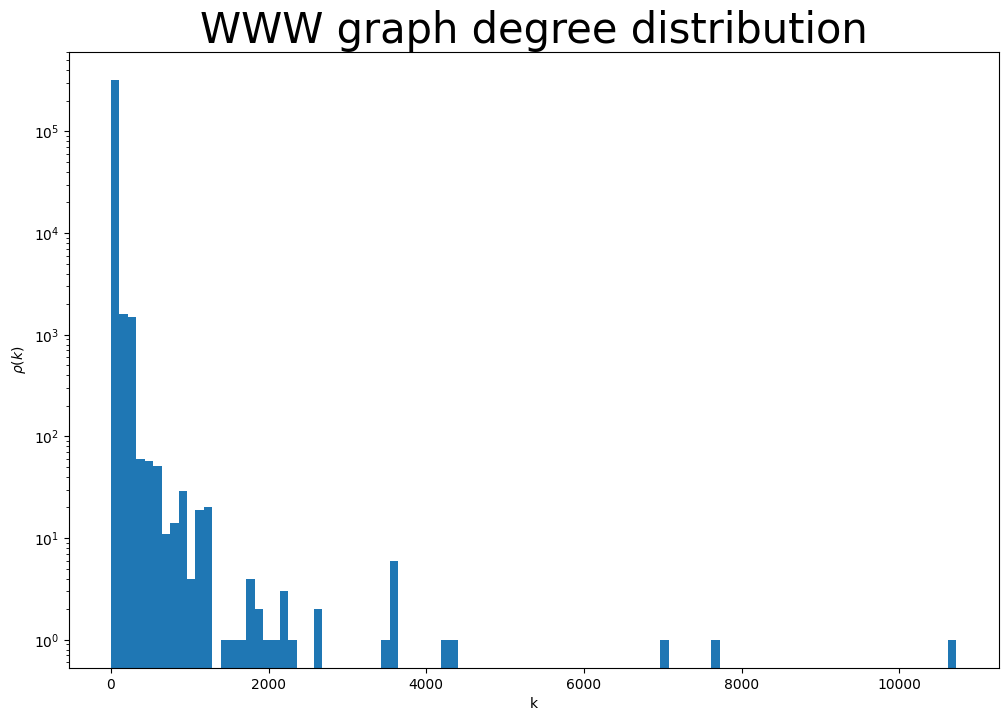

In [118]:
fig, ax = plt.subplots(figsize = (12,8))
_ = ax.hist(degrees, bins=100, log=True)

# ax = make_beautiful(ax)
ax.set_title('WWW graph degree distribution')
ax.set_xlabel('k')
ax.set_ylabel(r'$\rho(k)$')

Let's separate in- and out-degrees:

In [119]:
out_degrees=[d for n, d in G.out_degree()]
print(np.mean(out_degrees))
print('Max out-degree:', np.max(out_degrees))
print('Min out-degree:', np.min(out_degrees)) 

4.596256397189074
Max out-degree: 3445
Min out-degree: 0


In [120]:
in_degrees=[d for n, d in G.in_degree()]
print(np.mean(in_degrees))
print('Max in-degree:', np.max(in_degrees))
print('Min in-degree:', np.min(in_degrees)) 

4.596256397189074
Max in-degree: 10721
Min in-degree: 1


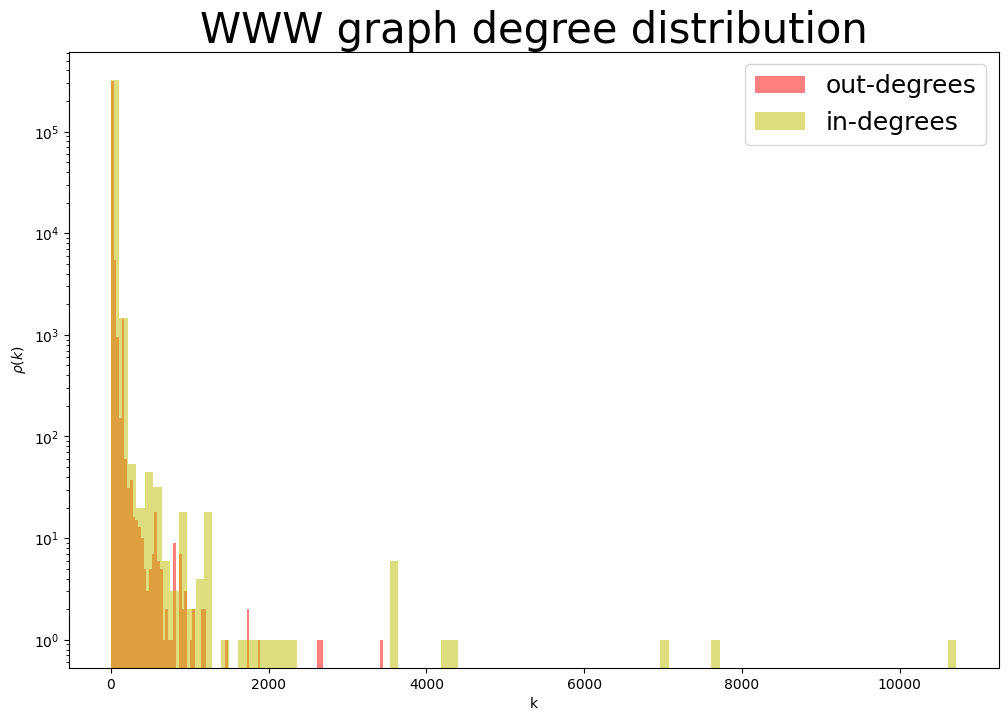

In [122]:
fig, ax = plt.subplots(figsize = (12,8))
_ = ax.hist(out_degrees, bins=100, log=True, alpha = 0.5, color='r', label='out-degrees')
_ = ax.hist(in_degrees, bins=100, log=True, alpha = 0.5, color='y', label='in-degrees')

# ax = make_beautiful(ax)
ax.set_title('WWW graph degree distribution')
ax.set_xlabel('k')
ax.set_ylabel(r'$\rho(k)$')

ax.legend()

# Clustering & transitivity

In [123]:
H = nx.to_undirected(nx.subgraph(G, sorted_scc[-10]))

In [124]:
len(H)

873


1. transitivity or global transitivity coefficient
$$
T=\frac{6N_t}{\sum_i k_i(k_i-1)},
$$

$N_t$ is the number of triangles,

$k_i$ is the degree of vertices, $\sum_i k_i(k_i-1)/2$ describes the number of all triples in the network.


2. The clustering coefficient $i$ of a vertex:

$$
C=\frac{2N_t(i)}{k_i(k_i-1)},
$$
$N_t$ is the number of triangles with vertex $i$.

In [125]:
print(nx.transitivity(H))

0.04893378993484035


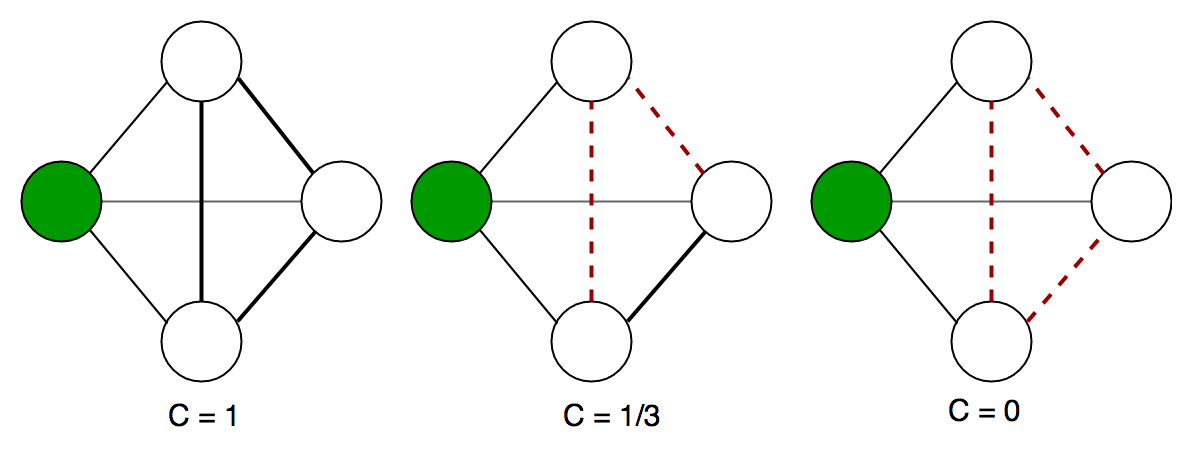

In [126]:
print(nx.clustering(G,list(H.nodes())[100])) # for a single node
print(nx.average_clustering(G))

0.5


KeyboardInterrupt: 

Text(0, 0.5, 'C(k)')

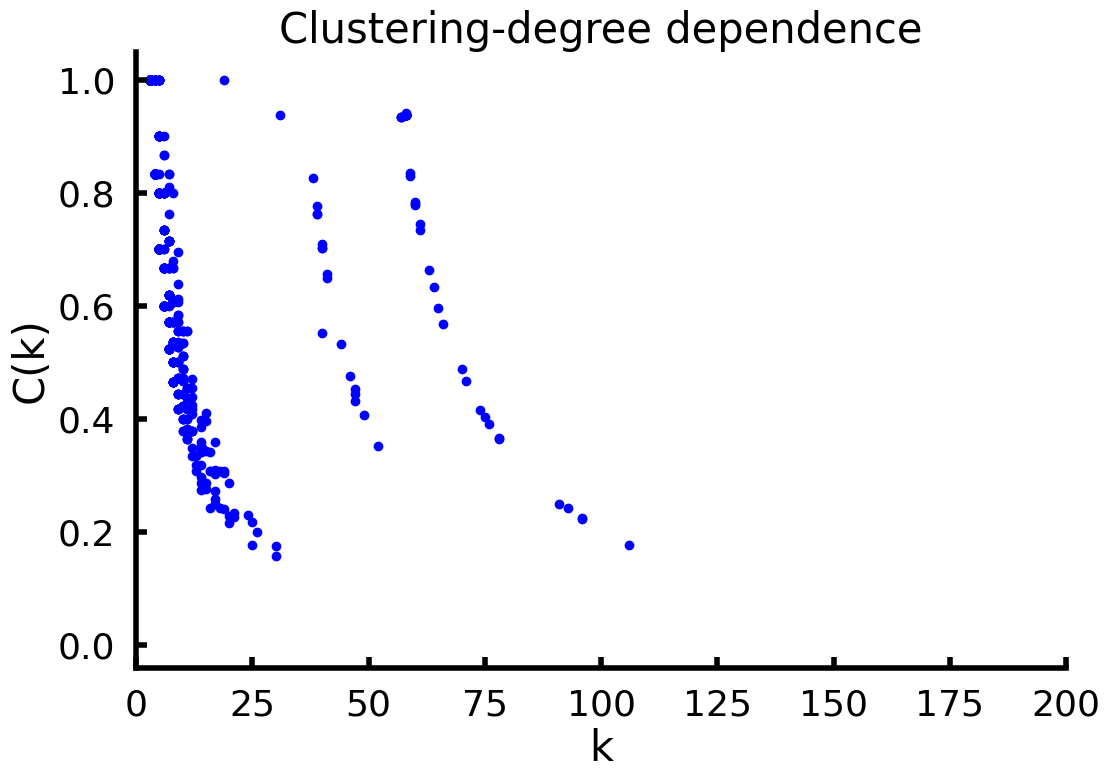

In [127]:
fig, ax = plt.subplots(figsize = (12,8))
ax = make_beautiful(ax)

clustering = list(nx.clustering(H).values())
degrees=[d for n, d in H.degree()]

ax.scatter(degrees, clustering, c = 'b')
ax.set_xlim(0, 200)
ax.set_title('Clustering-degree dependence')
ax.set_xlabel('k')
ax.set_ylabel('C(k)')